# Standaryzacja

Standaryzacja, w ogólnym znaczeniu, jest przekształceniem zmiennej do przyjętej skali, które pozwala na porównywanie różnych typów zmiennych. <br/> W niektórych źródłach rozróżniane są pojęcia standaryzacji i normalizacji. <br/> Standaryzacja jest to przekształcenie zmiennej do zmiennej o rozkładzie standardowym normalnym, czyli ze średnią 0 i odchyleniu standardowym 1. Normalizacja jest to przeskalowanie zmiennej, aby przyjmowała wartości w zadanym przedziale. 

## StandardScaler

Zakładamy, że dane mają rozkład normalny. Wówczas możemy dokonać standaryzacji za pomocą poniższego wzoru:
$$
Z = \frac{X - \mu}{\sigma}
$$
gdzie $\mu$ jest średnią, a $\sigma$ to odchylenie standardowe.

Przykład: <br/>
Załóżmy, że dwóch studentów chce porównać swoje wyniki, ale studiują na różnych uczelniach, które mają różne skale wyników. Na egzaminie końcowym student A otrzymał 81 punktów, a student B 589. W grupie studenta A średni wynik to 75, odchylenie standardowe to 5. Natomiast w grupie studenta B średni wynik to 550, a odchylenie standardowe to 50. Standaryzacja tych wyników przebiega następująco:
$$
Z_A = \frac{81-75}{5} = 1.2
$$
$$
Z_B = \frac{589-550}{50} = 0.78
$$

In [1]:
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import pandas as pd
from sklearn import metrics

In [2]:
data = pd.read_csv('iris_data.csv')
headers = list(data.columns.values)

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x = data[headers[:-1]]
y = data[headers[-1:]].values.ravel()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [6]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9904761904761905
0.9555555555555556


In [7]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.869524,3.050476,3.837143,1.232381
std,0.796039,0.409062,1.714265,0.739217
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


In [8]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_transf = scaler.transform(X_train)

In [9]:
df = pd.DataFrame(X_train_transf,columns = headers[0:-1])
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,-3.362390e-16,-1.342841e-15,-3.510419e-16,6.344132e-17
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.854900e+00,-2.089062e+00,-1.662958e+00,-1.539213e+00
25%,-9.713279e-01,-6.152556e-01,-1.311275e+00,-1.131432e+00
50%,-8.775611e-02,-1.239869e-01,3.299121e-01,9.191264e-02
75%,6.695911e-01,6.129162e-01,7.402090e-01,7.715483e-01
max,2.310510e+00,3.314894e+00,1.795258e+00,1.723038e+00


In [10]:
clfs = svm.SVC(kernel='linear', C=1)
clfs.fit(X_train_transf, y_train)
X_test_transf = scaler.transform(X_test)
print(clfs.score(X_train_transf, y_train))
print(clfs.score(X_test_transf, y_test))

0.9904761904761905
0.9777777777777777


## MinMaxScaler

$$
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

Dla dowolnego przedziału (a,b):
$$
X' = a + \frac{(X - X_{min})(b-a)}{X_{max} - X_{min}}
$$

Jako przykład rozpatrzmy wyniki uczniów z testu wstępnego na uczelnię. Załóżmy, że test przeprowadzony był w kilku różnych terminach i mimo, że starano się zachować ten sam poziom trudności możliwe, że poziomy testu między dniami się różniły. W tym przypadku nie byłoby sprawiedliwe porównywanie uczniów, którzy pisali test w różnych terminach. Aby móc porównywać wyniki uczniów dokonuje się nomalizacji ich wyników. 
<br/> Załóżmy, że uczniowie pisali test w dwóch grupach, w różnych terminach. W obydwu przypadkach można było uzyskać maksymalnie 50 punktów. W grupie A najmniejszy wynik testu wynosił 16, a największy 49, natomiast w grupie B najmniejszy wynik to 10, a największy to 42. <br/> 
Dla przykładowego wyniku 32 w grupie A, po normalizacji będzie on wynosił: 
$$
X_A = \frac{32 - 16}{49 - 16} = 0.4848
$$
Natomiast po normalizacji wynik 28 w grupie B wynosi: 
$$ 
X_B = \frac{28 - 10}{42 - 10} = 0.5625
$$

Zatem wynik 28 w grupie B jest lepszy niż 32 w grupie A.

In [11]:
minmax = preprocessing.MinMaxScaler()
minmax.fit(X_train)
X_train_mm = minmax.transform(X_train)

In [12]:
df2 = pd.DataFrame(X_train_mm,columns = headers[0:-1])
df2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,0.445310,0.386580,0.480872,0.471825
std,0.241224,0.185937,0.290553,0.308007
min,0.000000,0.000000,0.000000,0.000000
25%,0.212121,0.272727,0.101695,0.125000
50%,0.424242,0.363636,0.576271,0.500000
75%,0.606061,0.500000,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [13]:
clf_mm = svm.SVC(kernel='linear', C=1)
clf_mm.fit(X_train_mm, y_train)
X_test_mm = minmax.transform(X_test)
print(clf_mm.score(X_train_mm, y_train))
print(clf_mm.score(X_test_mm, y_test))

0.9809523809523809
0.9111111111111111


Standaryzacja nie ma wpływu na wyniki z modeli drzewiastych, m.in. drzew decyzyjnych, lasów losowych, XGBoosta. Natomiast dla modeli opartych na odległościach powinna być zastosowana. Są to m.in. SVM, k-NN, k-means.

# Bias–variance tradeoff

Załóżmy, że mamy dane dotyczące wzrostu i wagi pewnej grupy osób. Wraz ze wzrostem wagi spodziewany jest wzrost wzrostu.

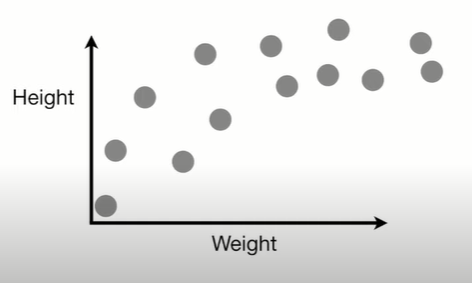

Patrząc na powyższy wykres możemy spekulować, jak mniej więcej powinna wyglądać linia przybliżająca nasze wartości. Podzielimy nasze dane na zbiór uczący (kolor niebieski) i zbiór testowy (kolor zielony).

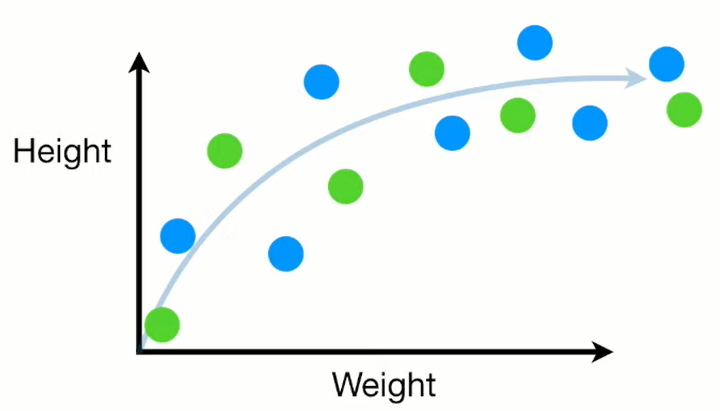

Chcemy znaleźć wzór na zależność między wagą i wzrostem.Rozważymy dwa sposoby: prosty i bardziej słożony. W przypadku prostym rozpatrzymy prostą linię.

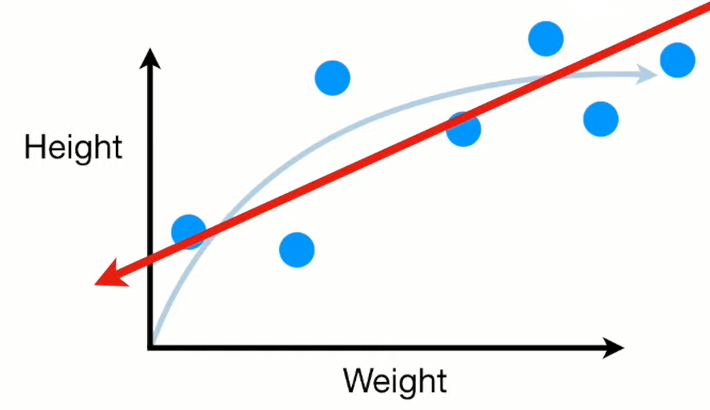

Widzimy, że w tym przypadku linia prosta, która odzwierciedla zależność między wzrostem i wagą, jest oddalona od obserwacji 
zbioru treningowego. Niestety nie możemy wygiąć lini, więc będziemy obserwować takie różnice w dopasowaniu. <br/>
Różnica między wartością rzeczywistą a średnią predykcją z modelu nazywa się bias. W powyższym przypadku mamy do czynienia z dużym obciążeniem.

Drugim modelem, który rozpatrzymy jest model złożony, który przedstawimy w postaci linii falistej, która idealnie dopasowywuje 
się do danych, co przedstawia poniższy wykres.

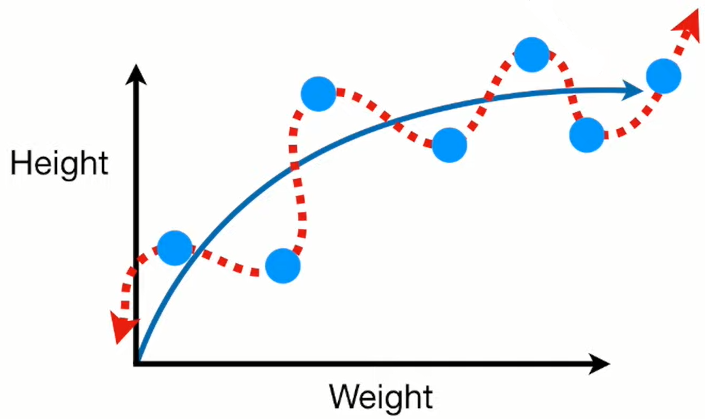

Poniższe wykresy pokazują dopasowanie linii do danych testowych.

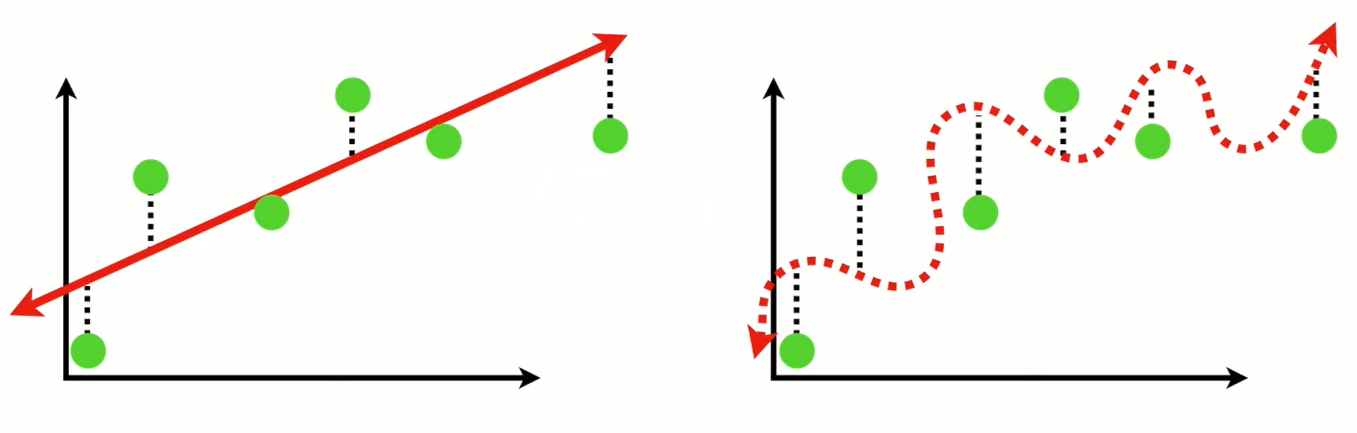

Widzimy, że dla linii prostej ponownie mamy nienajlepsze dopasowanie, jednak linia falista, która tak dobrze była dopasowana do danych treningowych, słabo dopasowuje dane testowe. <br/>
Porównując dwa sposoby możemy stwierdzić, że dla danych uczących lepszą opcją była linia falista, jednak dla danych testowych była to linia prosta.

W przypadku linii prostej mieliśmy większe błędy predykcji, zatem mieliśmy większy bias. Jednak dla nowych danych dopasowanie było podobne jak dla danych uczących, więc zmienność tego modelu jest niska. <br/>
Dla linii falistej mamy sytuację odwrotną: bardzo dobre dopasowanie krzywej do danych uczących, zatem niski bias, ale małe dopasowanie do nowych danych, zatem wysoka zmienność.

Jest to problem, w którym chcemy osiągnąć złoty środek: pragniemy, aby nasz model jak najlepiej dopasowywał się do danych uczących, ale jednocześnie dobrze radził sobie z nowymi danymi.

Od strony matematycznej wygląda to następująco: zakładamy, że mamy poniższą zależność między zmienną obsjaśnianą a objaśniającą:
$$
Y = f(X) + \epsilon
$$
gdzie $\epsilon$ jest błędem o rozkładzie normalnym ze średnią 0 i wariancją 1. <br/> Dokonujemy przybliżenia funkcji $f$ za pomocą $\hat{f}$, czyli np. regresji liniowej. <br/> Błąd takiego modelu przedstawia się następującym wzorem:
$$
Error(x) = E\left[ (Y - \hat{f}(x))^2 \right]
$$
Dalej możemy to rozpisać jako:
$$
Error(x) = \left( E\left[ \hat{f}(x)\right] - f(x) \right)^2 + E\left[ \left(  \hat{f}(x) - E[\hat{f}(x)]\right)^2 \right] + \sigma_{\epsilon}^2
$$
$$
Error(x) = \texttt{Bias}^2 + \texttt{Variance} + \texttt{Irreducible error}
$$

# Cross-Validation

Uczenie modelu i sprawdzanie jego dokładności nie powinno odbywać się na tych samych danych. Z tego powodu normą jest dzielenie zbioru na dwie części: uczącą i testową. Jednak powinno się również tworzyć zbiór walidacyjny, na którym możemy dobierać parametry. <br/>
Jednak dokonywanie podziału danych na trzy części może wydawać się utratą danych, ponieważ zmniejszamy ilość zmiennych do uczenia modelu. <br/> 
Wyjściem może być walidacja krzyżowa. Jest to metoda służąca do oceny, jak wyniki analizy uogólniają się na nieznany zbiór danych. Ogólnie polega ona na wykorzystywaniu różnych części danych do trenowania i testowania modelu.

### K-fold
W tej metodzie zbiór treningowy dzielimy na k mniejszych zbiorów, w miarę możliwości równych. Następnie k razy postępujemy w następujący sposób:
- uczymy model na k-1 zbiorach
- na jednym zbiorze dokonujemy walidacji. 

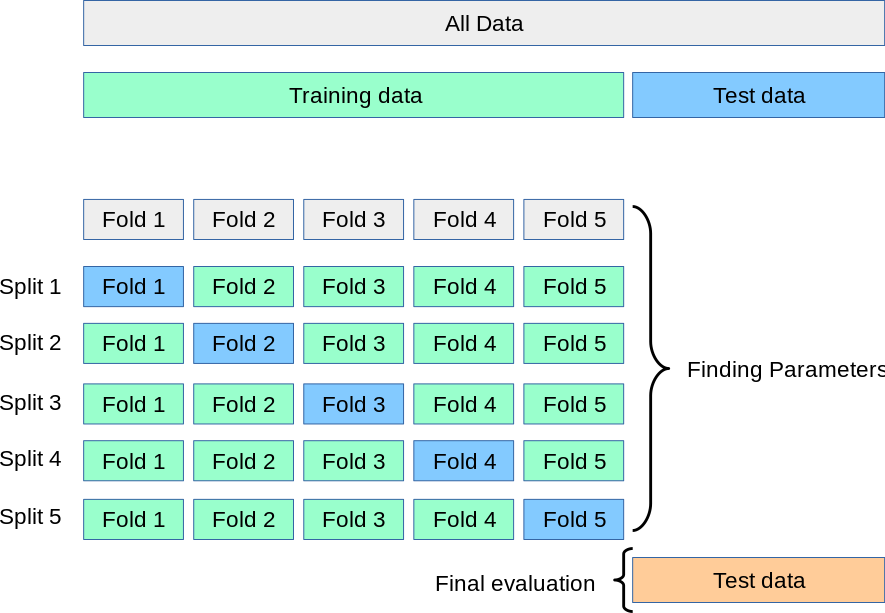

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [15]:
skf = KFold(n_splits=10)

In [16]:
predicted_y = []
expected_y = []
for train_index, test_index in skf.split(x, y):
    # specific ".loc" syntax for working with dataframes
    x_train_1, x_test_1 = x.loc[train_index], x.loc[test_index]
    y_train_1, y_test_1 = y[train_index], y[test_index]
    
    # standaryzacja
    scaler = preprocessing.StandardScaler()
    scaler.fit(x_train_1)
    x_train_transform = scaler.transform(x_train_1)
    x_test_transform = scaler.transform(x_test_1)

    # create and fit classifier
    classifier = svm.SVC(kernel='linear', C=1)
    classifier.fit(x_train_transform, y_train_1)

    # store result from classification
    predicted_y.extend(classifier.predict(x_test_transform))

    # store expected result for this specific fold
    expected_y.extend(y_test_1)

In [17]:
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print("Accuracy: " + accuracy.__str__())

Accuracy: 0.96


In [18]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_train_transf, y_train, cv=10)
scores

array([1.        , 1.        , 1.        , 1.        , 0.90909091,
       1.        , 1.        , 1.        , 0.9       , 0.9       ])

### Time Series Split
Jest to metoda, gdzie k części bierzemy do zbioru treningowego, a (k+1) część do zbioru testowego. Wówczas każdy kolejny zbiór treningowy jest wcześniejszym zbiorem.

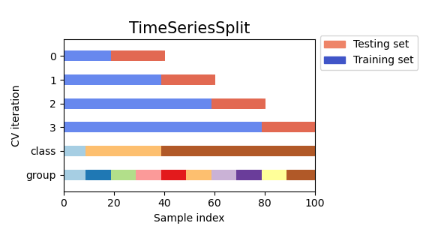

https://statisticsbyjim.com/glossary/standardization/ <br/> 
https://towardsdatascience.com/normalization-vs-standardization-explained-209e84d0f81e <br/>
https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html <br/>
https://www.statology.org/standardization-vs-normalization/ <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://treehozz.com/what-is-standard-scaler-in-python#:~:text=In%20this%20regard%2C%20what%20is%20standard%20scalar%20in,values%20will%20lie%20be%20between%20-1%20and%201.

https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229 <br/>
https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

https://scikit-learn.org/stable/modules/cross_validation.html <br/>
https://learn.g2.com/cross-validation#:~:text=Cross-validation%20%28CV%29%20is%20a%20technique%20used%20to%20assess,is%20tested%20on%20this%20sample%20to%20evaluate%20it. <br/> 
https://github.com/kentmacdonald2/k-Folds-Cross-Validation-Example-Python/blob/master/cross_validation_example.py